<a href="https://colab.research.google.com/github/mohkharma/kNN_CiFAR10dataset/blob/master/knn_CIFAR10_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pickle
import numpy as np
import os
import platform


%matplotlib inline



In [2]:

# coding: utf-8

# In[ ]:


import pickle
import numpy as np
import os
import platform


def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))

def load_CIFAR_batch(filename):
  """ load single batch of cifar """
  with open(filename, 'rb') as f:
    datadict = load_pickle(f)
    X = datadict['data']
    Y = datadict['labels']
    X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
    Y = np.array(Y)
    return X, Y

def load_CIFAR10(ROOT):
  """ load all of cifar """
  xs = []
  ys = []
  for b in range(1,6):
    f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
    X, Y = load_CIFAR_batch(f)
    xs.append(X)
    ys.append(Y)    
  Xtr = np.concatenate(xs)
  Ytr = np.concatenate(ys)
  del X, Y
  Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
  return Xtr, Ytr, Xte, Yte


In [3]:
class KNearestNeighbor(object):
    def __init__(self):
        pass
    def train(self, X, y):
        self.X_train = X
        self.y_train = y
    def predict(self, X, k=1, num_loops=0):
        if num_loops == 0:
            dists = self.compute_distances(X)
        else:
            raise ValueError('Invalid value %d for num_loops' % num_loops)
        return self.predict_labels(dists, k=k)


    def compute_distances(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train)) 
        dists = np.sqrt(np.sum(np.square(self.X_train), axis=1) + np.sum(np.square(X), axis=1)[:, np.newaxis] - 2 * np.dot(X, self.X_train.T))
        pass
        return dists

    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = []
            sorted_dist = np.argsort(dists[i])
            closest_y = list(self.y_train[sorted_dist[0:k]])
            pass
            y_pred[i]= (np.argmax(np.bincount(closest_y)))
            pass
        return y_pred



In [4]:
########################################################################
#
# Functions for downloading and extracting data-files from the internet.
#
# Implemented in Python 3.5
#
########################################################################
#
# This file is part of the TensorFlow Tutorials available at:
#
# https://github.com/Hvass-Labs/TensorFlow-Tutorials
#
# Published under the MIT License. See the file LICENSE for details.
#
# Copyright 2016 by Magnus Erik Hvass Pedersen
#
########################################################################

import sys
import os
import urllib.request
import tarfile
import zipfile

########################################################################


def _print_download_progress(count, block_size, total_size):
    """
    Function used for printing the download progress.
    Used as a call-back function in maybe_download_and_extract().
    """

    # Percentage completion.
    pct_complete = float(count * block_size) / total_size

    # Status-message. Note the \r which means the line should overwrite itself.
    msg = "\r- Download progress: {0:.1%}".format(pct_complete)

    # Print it.
    sys.stdout.write(msg)
    sys.stdout.flush()


########################################################################


def maybe_download_and_extract(url, download_dir):
    """
    Download and extract the data if it doesn't already exist.
    Assumes the url is a tar-ball file.

    :param url:
        Internet URL for the tar-file to download.
        Example: "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"

    :param download_dir:
        Directory where the downloaded file is saved.
        Example: "data/CIFAR-10/"

    :return:
        Nothing.
    """

    # Filename for saving the file downloaded from the internet.
    # Use the filename from the URL and add it to the download_dir.
    filename = url.split('/')[-1]
    file_path = os.path.join(download_dir, filename)

    # Check if the file already exists.
    # If it exists then we assume it has also been extracted,
    # otherwise we need to download and extract it now.
    if not os.path.exists(file_path):
        # Check if the download directory exists, otherwise create it.
        if not os.path.exists(download_dir):
            os.makedirs(download_dir)

        # Download the file from the internet.
        file_path, _ = urllib.request.urlretrieve(url=url,
                                                  filename=file_path,
                                                  reporthook=_print_download_progress)

        print()
        print("Download finished. Extracting files.")

        if file_path.endswith(".zip"):
            # Unpack the zip-file.
            zipfile.ZipFile(file=file_path, mode="r").extractall(download_dir)
        elif file_path.endswith((".tar.gz", ".tgz")):
            # Unpack the tar-ball.
            tarfile.open(name=file_path, mode="r:gz").extractall(download_dir)

        print("Done.")
    else:
        print("Data has apparently already been downloaded and unpacked.")


########################################################################

# Downloading the CIFAR-10 dataset 

In [5]:
url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
download_dir = "./data"
maybe_download_and_extract(url,download_dir)

- Download progress: 100.0%
Download finished. Extracting files.
Done.


# Loading raw files and reading them as training and testing datasets

In [13]:
cifar10_dir = './data/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# Checking the size of the training and testing data
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [8]:
print(X_test)

[[[[158. 112.  49.]
   [159. 111.  47.]
   [165. 116.  51.]
   ...
   [137.  95.  36.]
   [126.  91.  36.]
   [116.  85.  33.]]

  [[152. 112.  51.]
   [151. 110.  40.]
   [159. 114.  45.]
   ...
   [136.  95.  31.]
   [125.  91.  32.]
   [119.  88.  34.]]

  [[151. 110.  47.]
   [151. 109.  33.]
   [158. 111.  36.]
   ...
   [139.  98.  34.]
   [130.  95.  34.]
   [120.  89.  33.]]

  ...

  [[ 68. 124. 177.]
   [ 42. 100. 148.]
   [ 31.  88. 137.]
   ...
   [ 38.  97. 146.]
   [ 13.  64. 108.]
   [ 40.  85. 127.]]

  [[ 61. 116. 168.]
   [ 49. 102. 148.]
   [ 35.  85. 132.]
   ...
   [ 26.  82. 130.]
   [ 29.  82. 126.]
   [ 20.  64. 107.]]

  [[ 54. 107. 160.]
   [ 56. 105. 149.]
   [ 45.  89. 132.]
   ...
   [ 24.  77. 124.]
   [ 34.  84. 129.]
   [ 21.  67. 110.]]]


 [[[235. 235. 235.]
   [231. 231. 231.]
   [232. 232. 232.]
   ...
   [233. 233. 233.]
   [233. 233. 233.]
   [232. 232. 232.]]

  [[238. 238. 238.]
   [235. 235. 235.]
   [235. 235. 235.]
   ...
   [236. 236. 236.]
 

# Visualizing dataset samples

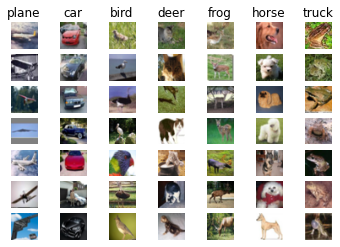

In [14]:
classes = ['plane', 'car', 'bird', 'deer', 'frog', 'horse', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# Data subsampling

In [15]:
# Memory error prevention by subsampling data

num_training = 35000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 7000
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

In [16]:
# reshaping data and placing into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)


(35000, 3072) (7000, 3072)


# Performing K-NN

In [28]:
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
dists= classifier.compute_distances(X_test)
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test



In [29]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

f1Score = f1_score(y_test, y_test_pred, average='micro')
print("-----------------------------F1 score-------------------------------------")
print(f1Score)


from sklearn.metrics import confusion_matrix

x = confusion_matrix (y_test,y_test_pred)
# print(x)

Got 2294 / 7000 correct => accuracy: 0.327714
-----------------------------F1 score-------------------------------------
0.32771428571428574


# Cross validation

performing 5-fold cross validation on k-NN for varying values of k 

In [30]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

X_train_folds = []
y_train_folds = []

X_train_folds = np.array_split(X_train,num_folds)
y_train_folds = np.array_split(y_train,num_folds)
k_to_accuracies = {}



for k in k_choices:
    k_to_accuracies[k] = []
    for num_knn in range(0,num_folds):
        X_test = X_train_folds[num_knn]
        y_test = y_train_folds[num_knn]
        X_train = X_train_folds
        y_train = y_train_folds
        
        temp = np.delete(X_train,num_knn,0)
        X_train = np.concatenate((temp),axis = 0)
        y_train = np.delete(y_train,num_knn,0)
        y_train = np.concatenate((y_train),axis = 0)
        
        classifier = KNearestNeighbor()
        classifier.train(X_train, y_train)
        dists = classifier.compute_distances(X_test)
        y_test_pred = classifier.predict_labels(dists, k)

        num_correct = np.sum(y_test_pred == y_test)
        accuracy = float(num_correct) / num_test
#         print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))
        k_to_accuracies[k].append(accuracy)


print("Printing our 5-fold accuracies for varying values of k:")
print()
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

Printing our 5-fold accuracies for varying values of k:

k = 1, accuracy = 0.251714
k = 1, accuracy = 0.259714
k = 1, accuracy = 0.247143
k = 1, accuracy = 0.249714
k = 1, accuracy = 0.249143
k = 3, accuracy = 0.246714
k = 3, accuracy = 0.244143
k = 3, accuracy = 0.239286
k = 3, accuracy = 0.244429
k = 3, accuracy = 0.244714
k = 5, accuracy = 0.249286
k = 5, accuracy = 0.247143
k = 5, accuracy = 0.246000
k = 5, accuracy = 0.247000
k = 5, accuracy = 0.250143
k = 8, accuracy = 0.255714
k = 8, accuracy = 0.240714
k = 8, accuracy = 0.247143
k = 8, accuracy = 0.247143
k = 8, accuracy = 0.248857
k = 10, accuracy = 0.246286
k = 10, accuracy = 0.242714
k = 10, accuracy = 0.246714
k = 10, accuracy = 0.245857
k = 10, accuracy = 0.250429
k = 12, accuracy = 0.250000
k = 12, accuracy = 0.242857
k = 12, accuracy = 0.246000
k = 12, accuracy = 0.249714
k = 12, accuracy = 0.251714
k = 15, accuracy = 0.246286
k = 15, accuracy = 0.241286
k = 15, accuracy = 0.247857
k = 15, accuracy = 0.242857
k = 15, acc

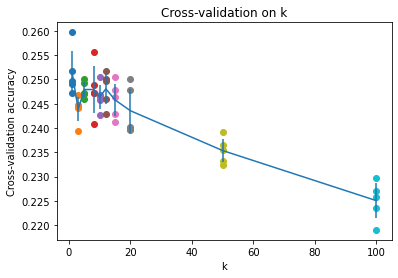

In [31]:
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation

accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [32]:
# Choosing best value of k based on cross-validation results

best_k = 10

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k)

# Computing and displaying the accuracy for best k found during cross-validation
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

from sklearn.metrics import f1_score, confusion_matrix, classification_report

f1Score = f1_score(y_test, y_test_pred, average='micro')
print("-----------------------------F1 score-------------------------------------")
print(f1Score)

Got 1753 / 7000 correct => accuracy: 0.250429
-----------------------------F1 score-------------------------------------
0.3130357142857143


In [ ]:
from sklearn.metrics import confusion_matrix

x = confusion_matrix (y_test,y_test_pred)
print(x)